<a href="https://colab.research.google.com/github/imchandanmohan/PyTorch/blob/main/Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
what_we_are_covering = {1: "prepare and loading data",
                        2: "build model",
                        3: ""}

In [5]:
import torch
from torch import nn # url for documentation https://pytorch.org/docs/stable/nn.html it contains the bulidning blocks for creating neural network
import matplotlib.pyplot as plt

#check the Pytorch version

torch.__version__

'2.2.1+cu121'

## Data (Preparing and loading)


1) Data can be anything but we are going to convert to numerical representation

2) Build model to learn the patterns in numbers

In [42]:
# Lets create a linear regression model and the fuction is "y = a + bx"
# a is intercept, b is weight and x is a parameter
# Create a "known" parameters or features or data

weight = 0.7 #b
bias = 0.3   #a

#lets create a data

start = 0
end = 1
step = 0.02


# X = torch.arange(start, end, step)  # capital X represents matrix and lowercase will be a vector

# Toggle between these two to check the graph

X = torch.rand(50)

In [43]:
print(X)

tensor([0.8772, 0.4955, 0.5410, 0.7696, 0.8377, 0.6579, 0.7742, 0.2525, 0.7009,
        0.6974, 0.2189, 0.5774, 0.1621, 0.1688, 0.5765, 0.9475, 0.7048, 0.4336,
        0.1034, 0.0389, 0.5645, 0.6738, 0.1511, 0.4760, 0.1131, 0.5645, 0.5107,
        0.1282, 0.9955, 0.6371, 0.8063, 0.3086, 0.9297, 0.0252, 0.6298, 0.1088,
        0.9412, 0.7711, 0.8771, 0.0739, 0.9531, 0.9588, 0.7183, 0.4898, 0.3950,
        0.1395, 0.1827, 0.4771, 0.6608, 0.0828])


In [44]:
y = bias + (weight * X) # a + bx

In [45]:
print(y)

tensor([0.9141, 0.6469, 0.6787, 0.8388, 0.8864, 0.7605, 0.8420, 0.4768, 0.7906,
        0.7882, 0.4532, 0.7042, 0.4135, 0.4181, 0.7036, 0.9632, 0.7934, 0.6035,
        0.3724, 0.3273, 0.6952, 0.7717, 0.4058, 0.6332, 0.3792, 0.6951, 0.6575,
        0.3898, 0.9968, 0.7460, 0.8644, 0.5160, 0.9508, 0.3176, 0.7408, 0.3761,
        0.9589, 0.8398, 0.9139, 0.3517, 0.9672, 0.9711, 0.8028, 0.6429, 0.5765,
        0.3976, 0.4279, 0.6340, 0.7626, 0.3579])


In [46]:
X [:10], y[:10]

(tensor([0.8772, 0.4955, 0.5410, 0.7696, 0.8377, 0.6579, 0.7742, 0.2525, 0.7009,
         0.6974]),
 tensor([0.9141, 0.6469, 0.6787, 0.8388, 0.8864, 0.7605, 0.8420, 0.4768, 0.7906,
         0.7882]))

From the above cell we have y which was generate by X and we know the reson for the value ***0.3140*** for the second value of x whihc is ***0.0200*** and there relation is 0.3 + (0.7 * 0.0200)



>"*Our goal is to find this equation using machine learning*"








In [47]:
X = torch.arange(start, end, step).unsqueeze(dim=1) # we will add one more dimension to the tensor values for woring with model which makes up with [[]]
print(X[:5])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])


# Splitting Data



1.   Training Set
2.   Validation Set "*we will iterate the process until it does well on validation set before we perform on Test Set*"
3.   Test Set "see if model is ready for genralization"

Main goal is to send genralize the model and see how weel it perform on unseen data


**100 samples -> 70 : 15 : 15**





In [48]:
# Create train/validate/test split
print(f"Total number of sample in X is {len(X)}")
train_spilt_sample = int(0.75*len(X)) # 78% for training
validate_split_sample = int(0.05 * len(X))  # 5% for validation
test_split_sample = int(len(X) - (train_spilt_sample + validate_split_sample))

print(f"sample of train is {train_spilt_sample}, validataion sample is {validate_split_sample} and test sample is {test_split_sample} and there total is {train_spilt_sample + validate_split_sample + test_split_sample}")


Total number of sample in X is 50
sample of train is 37, validataion sample is 2 and test sample is 11 and there total is 50


In [51]:
#Sklearn library can help us in spliting the sample like below one and also can add randomness in selecting sample
X_train, y_train = X[ : train_spilt_sample], y[ : train_spilt_sample]
X_validate, y_validate = X[train_spilt_sample : train_spilt_sample+validate_split_sample], y[train_spilt_sample : train_spilt_sample+validate_split_sample]
X_test,  y_test = X[train_spilt_sample+validate_split_sample : ], y[train_spilt_sample+validate_split_sample : ]

len(X_train), len(X_validate), len(X_test), len(y_train), len(y_validate), len(y_test)

(37, 2, 11, 37, 2, 11)

In [88]:
# Visulize sample on the Page

def plot_prediction(train_data =X_train,
                    train_label = y_train,
                    validate_data = X_validate,
                    validate_label = y_validate,
                    test_data = X_test,
                    test_label = y_test,
                    prediction = None):
  """
  Plots all the samples
  """
  plt.figure(figsize = (10,7))

  #plot training data in blue
  plt.scatter(train_data, train_label, s = 1, c = "b", label = "Training sample")

  #plot validation data in red
  plt.scatter(validate_data,validate_label, s = 4, c = "#FF007F", label = "validation sample")

  #plot test data in green
  plt.scatter(test_data,test_label, s = 4, c = "g", label = "Test sample")

  #Are there prediction

  if prediction is not None:

    #Plot predictions
    plt.scatter(test_data, prediction, s = 4, c = "r", label = "prediction")

  #show legends
  plt.legend( prop = { "size" : 14 } );


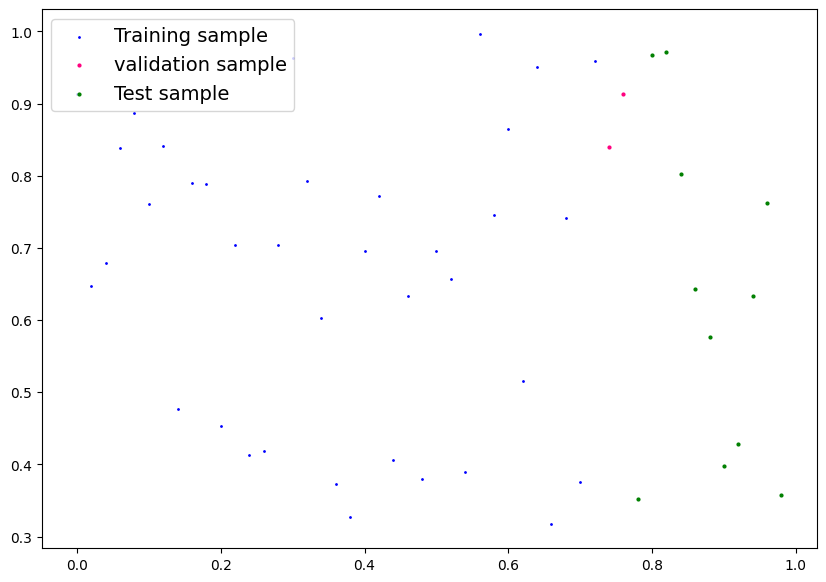

In [89]:
plot_prediction()

# Build Model

In [80]:
#Create linear regression model class

class LinearRegressionModel(nn.Module): #we are inheriting nn.Model class in this
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))
  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

### PyTorch modules


* torch.nn (all models)
* torch.nn.parameter (.nn will take these parameters)

>.nn will take these parameters

* torch.nn.Module (The base class for all the neural network modules, if subclass then overwrite with forward())
* torch.optim (help with GD)






For creating data

*  torchvision.transforms
*  torch.utils.data.Dataset
*  torch.utils.data.Dataloader

Selecting A model

*  torch.nn
*  torch.nn.Module
*  toechvision.models

Optimization of model

*  torch.optim

Evaluation of model

*  torchmetrics

imporve through experiment

*  torch.utils.tensorboard





In [81]:
# To check model parameters we can use .parameters()

# Create randome seed

torch.manual_seed(42) # if there is no random seed we get different value everytime

# Create an instance of a model (this is a subclass of a nn.module)

model_0 = LinearRegressionModel()
model_0



LinearRegressionModel()

In [82]:
#check the parameters

model_0.parameters()

<generator object Module.parameters at 0x7a38a4935c40>

In [83]:
#generator? so

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [84]:
#List the name parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [85]:
# making prediction using torch.inference_mode()

with torch.inference_mode():   # this will not track the gradient if you use .inference_mode()wit
  y_preds = model_0(X_test)
y_preds

tensor([[0.3914],
        [0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

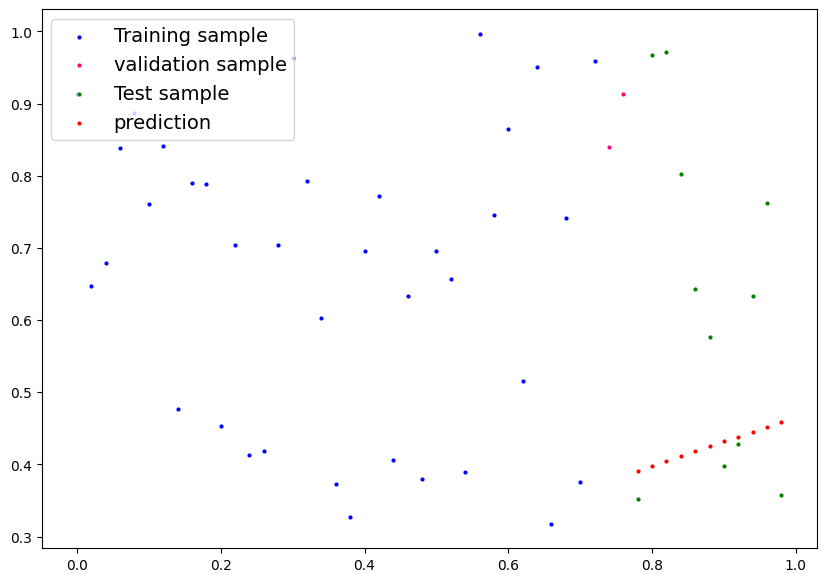

In [86]:
plot_prediction(prediction= y_preds)

In [91]:
with torch.no_grad():   # new method which runs your code faster
  y_pred = model_0(X_test)

y_pred

tensor([[0.3914],
        [0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [93]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [96]:
#make model to converge better to the data

#loss function or cost function help us see fow model is performing. -- lower is better
#optimizer adjust model parameters to improve loss function

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [97]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#Loss Fuction



In [99]:
loss_fn = nn.L1Loss()

#Optimizer troch.optim

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.0245) #lr leraning rate is a hyper parameter



# Building a training Loop

In [ ]:
epochs = 1

for epoch in range(epochs):
  model_0.train() # train mode in Pytorch set gradient to true for tracking

  model_0.eval() #turns off gradient tracking
